# ARCS Ei=100meV resolution

Instrument: ARCS
* Ei=100meV
* Fermi chopper: 600 Hz
* T0: 120Hz

Sample: resolution sample
* hkl: -16/3.,-8/3.,8/3.
* E: 40

In [1]:
# some goodies
%matplotlib notebook
# %matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import histogram.hdf as hh, histogram as H

In [3]:
%cd /SNS/users/lj7/jupyter/notebooks/simulations/ARCS/Si

/SNS/users/lj7/jupyter/notebooks/simulations/ARCS/Si


## Formula
See NIMA 736(2014)31-39

## Input Parameters

### Instrument parameters

In [4]:
Ei = 100
L_PM=11.61
R = 3.
L_PS=13.6
L_MS=L_PS-L_PM

In [5]:
print L_MS

1.99


### Dynamics

In [6]:
E = 40.
hkl = -16/3.,-8/3.,8/3.

In [7]:
%%file Si.yml
name: Si
chemical_formula: Si2
lattice: 
 constants: 5.490700041, 5.490700041, 5.490700041, 90, 90, 90
 basis_vectors:
  - 5.490700041, 0, 0
  - 0, 5.490700041, 0
  - 0, 0, 5.490700041
 primitive_basis_vectors:
  - 0.0, 2.71526503565, 2.71526503565
  - 2.71526503565, 0.0, 2.71526503565
  - 2.71526503565, 2.71526503565, 0.0
excitations:
  - type: deltafunction
    hkl: -16/3.,-8/3.,8/3.
    E: 40.
    dE: 0.5
orientation:
 u: -1, 1, -1
 v: 2, 1, -1
shape: hollowCylinder in_radius="5./8*inch" out_radius="1.*inch" height="1.5*inch"
temperature: 100*K

Overwriting Si.yml


### Other parameters

In [8]:
m = 1.6750e-24 * 1e-3 #kg

### Derived parameters

In [9]:
from mcni.utils import conversion as Conv

In [10]:
vi = Conv.e2v(Ei)
print vi

4373.93313724


In [11]:
ti = L_PM/vi*1e6 # microsecond
print ti

2654.36156331


In [12]:
Ef = Ei - E

In [13]:
vf = Conv.e2v(Ef)
print vf

3388.03403959


In [14]:
!mcvine workflow sx orientation solve_psi --help

/home/lj7/miniconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/deployment_info.py:41: UserWarning: Neither environment variable MCVINE_DIR nor DANSE_DIR was defined. Assumed that it is /home/lj7/miniconda2/envs/mcvine.
  warnings.warn(msg)
Usage: mcvine workflow sx orientation solve_psi [OPTIONS] SAMPLE

  compute psi angle

Options:
  --Ei FLOAT
  --hkl <FLOAT FLOAT FLOAT>...
  --E FLOAT
  --psimin FLOAT
  --psimax FLOAT
  --number-segments INTEGER
  --help                        Show this message and exit.


In [15]:
hkl_opt = '%s %s %s' % tuple(hkl)

In [16]:
!mcvine workflow sx orientation solve_psi --Ei=100 --hkl {hkl_opt} \
    --E 40 --psimin -5 --psimax 90 Si.yml 

/home/lj7/miniconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/deployment_info.py:41: UserWarning: Neither environment variable MCVINE_DIR nor DANSE_DIR was defined. Assumed that it is /home/lj7/miniconda2/envs/mcvine.
  warnings.warn(msg)
/home/lj7/miniconda2/envs/mcvine/share/mcvine/workflow/mcvine_workflow/singlextal/solve_psi.py:55: UserWarning: Traceback (most recent call last):
  File "/home/lj7/miniconda2/envs/mcvine/share/mcvine/workflow/mcvine_workflow/singlextal/solve_psi.py", line 52, in solve
    results.append(solver(res, min, max))
  File "/home/lj7/miniconda2/envs/mcvine/lib/python2.7/site-packages/scipy/optimize/zeros.py", line 442, in brentq
    r = _zeros._brentq(f,a,b,xtol,rtol,maxiter,args,full_output,disp)
ValueError: f(a) and f(b) must have different signs

  warnings.warn(tb.format_exc())
psi=46.374678916, Q=[  5.41072298e+00  -5.15712343e+00  -1.43726139e-16]
hkl2Q=array([[ -1.13216999e+00,   1.66395565e-01,   4.64725066e-18],
       [  1.17659432e-01,   8.

In [17]:
Q =  np.array([5.41072298, -5.15712343,  0. ])

In [18]:
Q_len = np.linalg.norm(Q); print Q_len

7.47474716887


In [19]:
ki = Conv.e2k(Ei); print ki

6.94692092177


In [20]:
kiv = np.array([ki, 0, 0])
kfv = kiv - Q

** Verify the momentum and energy transfers **

In [21]:
print Ei-Conv.k2e(np.linalg.norm(kfv))
print Ei-Ef

39.9999999739
40.0


** Compute detector pixel position **

In [22]:
z = kfv[2]/(kfv[0]**2+kfv[1]**2)**.5 * R
L_SD=(z**2+R**2)**.5
print z, L_SD

0.0 3.0


### Constants

In [23]:
eV = 1.60218e-19
meV = eV*1e-3
mus = 1.e-6

In [24]:
hbar= 1.0545718e-34
AA = 1e-10

from numpy import sin, cos

## Differentials

In [25]:
pE_pt = -m*(vi**3/L_PM + vf**3/L_SD * L_MS/L_PM)
# convert to eV/microsecond
pE_pt /= meV/mus
print pE_pt

pE_ptMD = m*vf**3/L_SD
pE_ptMD /= meV/mus
print pE_ptMD

pE_pLPM = m/L_PM * (vi**2 + vf**3/vi * L_MS/ L_SD)
pE_pLPM /= meV
print pE_pLPM

pE_pLMS= -m/L_SD * (vf**3/vi)
pE_pLMS /= meV
print pE_pLMS

pE_pLSD = -m*vf*vf/L_SD
pE_pLSD /= meV
print pE_pLSD

# we don't need pE_pLSD, instead we need pE_pR and pE_pz. R and z are cylinder radius and z coordinate
pE_pR = pE_pLSD * (R/L_SD)
pE_pz = pE_pLSD * (z/L_SD)
print pE_pR, pE_pz

-0.098580621628
0.135526912828
22.5382095553
-30.9851359349
-40.0016384853
-40.0016384853 -0.0


## Estimate of standard deviations

In [26]:
tau_P = 10 # microsecond
tau_M = 8 # microsecond
tau_D = 10 # microsecond

In [27]:
tau_D = 0.025/vf*1e6 # microsecond
tau_D

7.3789105150210617

## Calculations

In [28]:
pE_p_vec = [pE_pt, pE_ptMD, pE_pLPM, pE_pLMS, pE_pR, pE_pz]
pE_p_vec = np.array(pE_p_vec)
J_E = pE_p_vec/E

In [29]:
print J_E

[-0.00246452  0.00338817  0.56345524 -0.7746284  -1.00004096 -0.        ]


In [30]:
sigma_t = (tau_P**2+tau_M**2)**.5

In [31]:
sigma_tMD = (tau_M**2+tau_D**2)**.5

In [32]:
div = 0.01
sigma_LPM = L_PM * div*div

In [33]:
# mainly due to sample size
sigma_LMS = 0.025*2

In [34]:
# mainly due to det tube diameter
sigma_R = 0.025

In [35]:
# pixel size
sigma_z = 1./128

In [36]:
sigma = np.array([sigma_t, sigma_tMD, sigma_LPM, sigma_LMS, sigma_R, sigma_z])
print sigma
sigma2 = sigma*sigma
print sigma2
sigma2 = np.diag(sigma2)

[  1.28062485e+01   1.08833965e+01   1.16100000e-03   5.00000000e-02
   2.50000000e-02   7.81250000e-03]
[  1.64000000e+02   1.18448320e+02   1.34792100e-06   2.50000000e-03
   6.25000000e-04   6.10351562e-05]


In [37]:
print sigma2

[[  1.64000000e+02   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.18448320e+02   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.34792100e-06   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   2.50000000e-03
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    6.25000000e-04   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   6.10351562e-05]]


In [38]:
print J_E

[-0.00246452  0.00338817  0.56345524 -0.7746284  -1.00004096 -0.        ]


In [39]:
print np.dot(sigma2, J_E)

[ -4.04180549e-01   4.01323380e-01   7.59493149e-07  -1.93657100e-03
  -6.25025601e-04   0.00000000e+00]


In [40]:
cov = np.dot(J_E, np.dot(sigma2, J_E))

In [41]:
print cov, np.sqrt(cov)

0.00448146424422 0.0669437393952


In [42]:
sigma_E = E*np.sqrt(cov)
print sigma_E

2.67774957581


Not sure if this is right:

* ** Note: this may be more like FWHM than sigma_E because of the approx I made **
* ** FWHM is 2.355 sigma **

## Include Q

In [43]:
print ti

2654.36156331


In [44]:
tf = L_SD/vf*1e6; print tf

885.469261803


In [45]:
thetai = 0
phii = 0

In [46]:
print R

3.0


In [47]:
print Q

[ 5.41072298 -5.15712343  0.        ]


In [48]:
eeta = np.arctan2(Q[1], Q[0])
print eeta

-0.761405490065


In [49]:
pQx_pt = -m/hbar*(L_PM/ti/ti/mus/mus*cos(thetai)*cos(phii)
                  +R/tf/tf/mus/mus*L_MS/L_PM*cos(eeta))
pQx_pt/=1./AA/mus
print pQx_pt

pQx_ptMD = m/hbar * R/tf/tf * cos(eeta) / mus/mus
pQx_ptMD /= 1./AA/mus
print pQx_ptMD

pQx_pLPM = m/hbar *(cos(thetai) * cos(phii)/ti + ti/tf/tf * R*L_MS/L_PM/L_PM * cos(eeta)) / mus
pQx_pLPM /= 1./AA
print pQx_pLPM

pQx_pLMS = -m/hbar * R/tf/tf*ti/L_PM*cos(eeta) / mus
pQx_pLMS /= 1./AA
print pQx_pLMS

pQx_pR = -m/hbar/tf*cos(eeta) / mus
pQx_pR /= 1./AA
print pQx_pR

pQx_peeta = m/hbar * R/tf*sin(eeta) /mus
pQx_peeta /= 1./AA
print pQx_peeta

pQx_pthetai = -m/hbar*L_PM/ti*sin(thetai)*cos(phii)/mus
pQx_pthetai/=1./AA
print pQx_pthetai

pQx_pphii = -m/hbar*L_PM/ti*cos(thetai)*sin(phii)/mus
pQx_pphii/=1./AA
print pQx_pphii

-0.00337132006941
0.00439917992571
0.770775401367
-1.00577210206
-1.29844620045
-3.71276482701
-0.0
-0.0


In [50]:
pQx_p_vec = [pQx_pt, pQx_ptMD, pQx_pLPM, pQx_pLMS, pQx_pR, 0, pQx_peeta, pQx_pthetai, pQx_pphii]
pQx_p_vec = np.array(pQx_p_vec)
J_Qx = pQx_p_vec/Q_len
J_Qx

array([ -4.51027974e-04,   5.88538960e-04,   1.03117254e-01,
        -1.34556003e-01,  -1.73711053e-01,   0.00000000e+00,
        -4.96707747e-01,  -0.00000000e+00,  -0.00000000e+00])

**Qy**

In [51]:
pQy_pt = -m/hbar*(L_PM/ti/ti*sin(thetai)*cos(phii)+R/tf/tf*L_MS/L_PM*sin(eeta))/mus/mus
pQy_pt/=1./AA/mus
print pQy_pt

pQy_ptMD = m/hbar * R/tf/tf * sin(eeta) / mus/mus
pQy_ptMD /= 1./AA/mus
print pQy_ptMD

pQy_pLPM = m/hbar *(sin(thetai) * cos(phii)/ti 
                    + ti/tf/tf * R*L_MS/L_PM/L_PM * sin(eeta)) / mus
pQy_pLPM /= 1./AA
print pQy_pLPM

pQy_pLMS = -m/hbar * R/tf/tf*ti/L_PM*sin(eeta) / mus
pQy_pLMS /= 1./AA
print pQy_pLMS

pQy_pR = -m/hbar/tf*sin(eeta) / mus
pQy_pR /= 1./AA
print pQy_pR

pQy_peeta = -m/hbar * R/tf*cos(eeta) /mus
pQy_peeta /= 1./AA
print pQy_peeta

pQy_pthetai = m/hbar*L_PM/ti*cos(thetai)*cos(phii)/mus
pQy_pthetai/=1./AA
print pQy_pthetai

pQy_pphii = -m/hbar*L_PM/ti*sin(thetai)*sin(phii)/mus
pQy_pphii/=1./AA
print pQy_pphii

0.000718695305589
-0.00419299120497
-0.164313281214
0.958631756226
1.23758827567
-3.89533860136
6.94721592677
-0.0


In [52]:
pQy_p_vec = [pQy_pt, pQy_ptMD, pQy_pLPM, pQy_pLMS, pQy_pR, 0, pQy_peeta, pQy_pthetai, pQy_pphii]
pQy_p_vec = np.array(pQy_p_vec)
J_Qy = pQy_p_vec/Q_len
J_Qy

array([  9.61497813e-05,  -5.60954252e-04,  -2.19824534e-02,
         1.28249389e-01,   1.65569249e-01,   0.00000000e+00,
        -5.21133159e-01,   9.29424871e-01,  -0.00000000e+00])

** Qz **

In [53]:
pQz_pt = -m/hbar*(L_PM/ti/ti*sin(phii)+z/tf/tf*L_MS/L_PM)/mus/mus
pQz_pt/=1./AA/mus
print pQz_pt

pQz_ptMD = m/hbar * z/tf/tf /mus/mus
pQz_ptMD /= 1./AA/mus
print pQz_ptMD

pQz_pLPM = m/hbar *(sin(phii)/ti + ti/tf/tf * z*L_MS/L_PM/L_PM) / mus
pQz_pLPM /= 1./AA
print pQz_pLPM

pQz_pLMS = -m/hbar * z/tf/tf*ti/L_PM / mus
pQz_pLMS /= 1./AA
print pQz_pLMS

pQz_pz = -m/hbar/tf / mus
pQz_pz/=1./AA
print pQz_pz

pQz_pphii = m/hbar*L_PM/ti*cos(phii)/mus
pQz_pphii/=1./AA
print pQz_pphii

-0.0
0.0
0.0
-0.0
-1.79376343913
6.94721592677


In [54]:
pQz_p_vec = [pQz_pt, pQz_ptMD, pQz_pLPM, pQz_pLMS, 0, pQz_pz, 0, 0, pQz_pphii]
pQz_p_vec = np.array(pQz_p_vec)
J_Qz = pQz_p_vec/Q_len

** Here we need to extend the J vector for E to include the additional variables eeta, thetai, and phii **

In [55]:
pE_p_vec = [pE_pt, pE_ptMD, pE_pLPM, pE_pLMS, pE_pR, pE_pz,0,0,0]
pE_p_vec = np.array(pE_p_vec)
J_E = pE_p_vec/E

In [56]:
J = np.array( (J_Qx, J_Qy, J_Qz, J_E) )

In [57]:
print J

[[ -4.51027974e-04   5.88538960e-04   1.03117254e-01  -1.34556003e-01
   -1.73711053e-01   0.00000000e+00  -4.96707747e-01  -0.00000000e+00
   -0.00000000e+00]
 [  9.61497813e-05  -5.60954252e-04  -2.19824534e-02   1.28249389e-01
    1.65569249e-01   0.00000000e+00  -5.21133159e-01   9.29424871e-01
   -0.00000000e+00]
 [ -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
    0.00000000e+00  -2.39976470e-01   0.00000000e+00   0.00000000e+00
    9.29424871e-01]
 [ -2.46451554e-03   3.38817282e-03   5.63455239e-01  -7.74628398e-01
   -1.00004096e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]]


## sigma

In [58]:
sigma_eeta = 0.025/3
sigma_thetai = 0.01
sigma_phii = 0.01

In [59]:
sigma = np.array([sigma_t, sigma_tMD, sigma_LPM, sigma_LMS, sigma_R, sigma_z, sigma_eeta, sigma_thetai, sigma_phii])
sigma2 = sigma**2
sigma2 = np.diag(sigma2)

In [60]:
print J.shape, sigma2.shape

(4, 9) (9, 9)


In [61]:
cov = np.dot(J, np.dot(sigma2, J.T))

In [62]:
print cov

[[  1.55660376e-04  -8.93618668e-05   0.00000000e+00   7.87720603e-04]
 [ -8.93618668e-05   2.02284654e-04   0.00000000e+00  -6.15851689e-04]
 [  0.00000000e+00   0.00000000e+00   8.98979948e-05   0.00000000e+00]
 [  7.87720603e-04  -6.15851689e-04   0.00000000e+00   4.48146424e-03]]


In [63]:
M = np.linalg.inv(cov)
print M

[[ 70581.73448947 -11331.32966842      0.         -13963.53994496]
 [-11331.32966842  10318.71766374      0.           3409.76089802]
 [     0.              0.          11123.71862895      0.        ]
 [-13963.53994496   3409.76089802     -0.           3146.13134216]]


In [64]:
np.dot(cov, M)

array([[  1.00000000e+00,  -5.90199187e-17,   0.00000000e+00,
          1.08194120e-16],
       [  8.09066919e-16,   1.00000000e+00,   0.00000000e+00,
         -1.83990883e-16],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00],
       [ -9.17594112e-15,  -3.99937900e-16,   0.00000000e+00,
          1.00000000e+00]])

## Ellipsoid

In [65]:
hkl_dir = [-1,1,-1]
hkl0 = [-16/3.,-8/3.,8/3.]
# hkl = hkl0+hkl_dir*x
# dh,dk,dl = dx2dhkl*dx 
dx2dhkl = np.array(hkl_dir)

In [66]:
# Q = hkl dot hkl2Q
hkl2Q=np.array([[ -1.13216999e+00,   1.66395565e-01,   4.64725066e-18],
       [  1.17659432e-01,   8.00565078e-01,  -8.09165116e-01],
       [ -1.17659432e-01,  -8.00565078e-01,  -8.09165116e-01]])

In [67]:
# dQ = dx * dx2dhkl dot hkl2Q
# so dx2dQ = dx2dhkl * hkl2Q
# dQ = dx * dx2dQ
dx2dQ = np.dot(dx2dhkl, hkl2Q)
print dx2dQ

[ 1.36748885  1.43473459  0.        ]


In [68]:
# [dQx,dQy,dQz,dE] = [dx dE] dot dxdE2dQdE
L=dxdE2dQdE = np.array([[ 1.36748885,  1.4347346,   0.,  0], 
                        [ 0.        ,  0.,          0.,  1]
                        ])

In [69]:
np.dot([1,1], dxdE2dQdE)

array([ 1.36748885,  1.4347346 ,  0.        ,  1.        ])

$ [dX1,\; dX2,\; dX3,\; dX4]\; M\; [dX1,\; dX2,\; dX3,\; dX4 ]^T = 2ln(2)$

$ dX_i = \frac{dQ_i}{|Q|}$ for i = 1,2,3

$ dX_4 = \frac{dE}{E}$

Let 
$ U = diag\big( \frac{1}{|Q|},\; \frac{1}{|Q|},\; \frac{1}{|Q|},\; 1/E \big) $

$ [dx,\; dE]\; L U MU^TL^T [dx,\; dE ]^T = 2ln(2)$

Let $N=L U MU^TL^T $

In [70]:
print Q_len, E

7.47474716887 40.0


In [71]:
U = np.diag([1./Q_len, 1./Q_len, 1./Q_len, 1./E])
N = LUMUTLT = np.dot(L, np.dot(U, np.dot(M, np.dot(U.T, L.T))))
print N

[[ 1946.71570243   -47.50288847]
 [  -47.50288847     1.96633209]]


In [72]:
print 2*np.log(2)

1.38629436112


In [73]:
r = np.linalg.eig(N)

In [74]:
len(r)

2

In [75]:
r[0]

array([  1.94787533e+03,   8.06707246e-01])

In [76]:
r[1]

array([[ 0.99970217,  0.0244044 ],
       [-0.0244044 ,  0.99970217]])

In [77]:
mR = r[1]; lambdas = r[0]

In [78]:
np.dot(mR, mR.T)

array([[  1.00000000e+00,  -3.46944695e-18],
       [ -3.46944695e-18,   1.00000000e+00]])

In [79]:
np.dot(np.dot(mR.T, N), mR)

array([[  1.94787533e+03,   1.42108547e-14],
       [ -2.49453236e-15,   8.06707246e-01]])

$ u = [dx,\;dE]$

$ u N u^T = 2ln(2)$        .... (1)

Find eigen values ($\lambda_1$, $\lambda_2$) and eigne vectors ($e_1$, $e_2$, column vectors) of N,
and let 

$ R = [e_1,\;e_2] $

Then

$ N' = R^T N R = diag([\lambda_1, \lambda_2]) $

or

$ N = R N' R^T $

With $N'$ we can rewrite (1) as

$ u'N'{u'}^T = 2ln2 = \lambda_1 {u'}_1^2 + \lambda_2 {u'}_2^2 $

where

$ u' = u . R $

${u'}_1 = \sqrt{2ln2/\lambda_1}*cos(\theta)$

${u'}_2 = \sqrt{2ln2/\lambda_2}*sin(\theta)$

In [80]:
RR = 2*np.log(2)

In [81]:
theta = np.arange(0, 360, 1.)*np.pi/180

In [82]:
u1p = np.sqrt(RR/lambdas[0])*np.cos(theta)
u2p = np.sqrt(RR/lambdas[1])*np.sin(theta)

In [83]:
up = np.array([u1p, u2p]).T
print up.shape

(360, 2)


In [84]:
u = np.dot(up, mR.T)

In [85]:
u.shape

(360, 2)

<IPython.core.display.Javascript object>


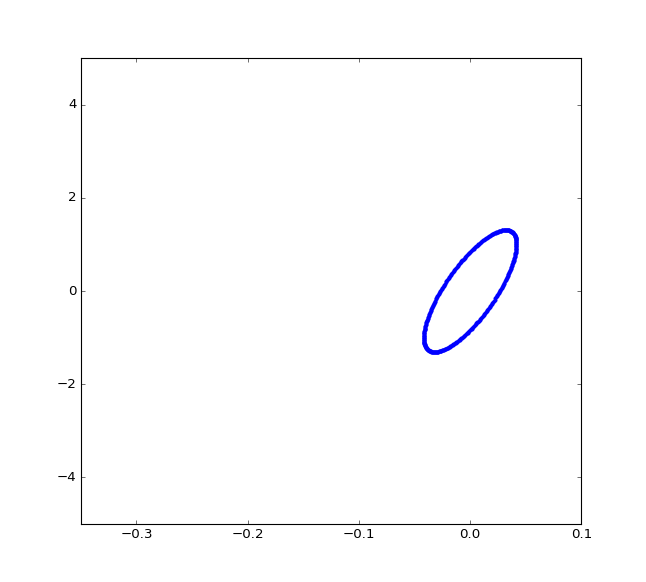

(-5.0, 5.0)

In [86]:
plt.figure()
plt.plot(u[:,0], u[:,1], '.')
plt.xlim(-.35, .1)
plt.ylim(-5., 5.)

<IPython.core.display.Javascript object>


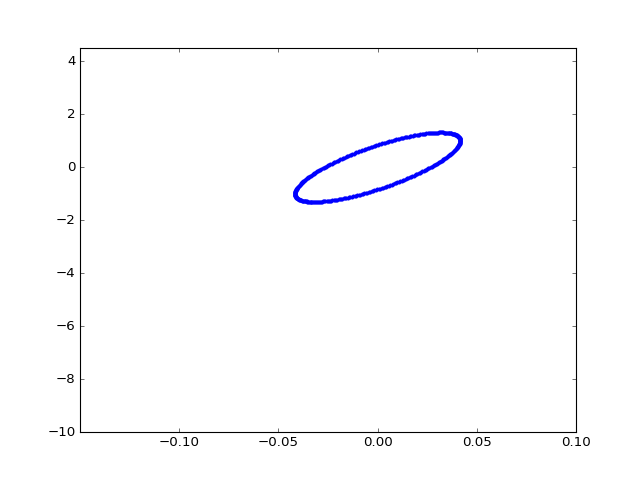

(-10, 4.5)

In [87]:
plt.figure()
plt.plot(u[:,0], u[:,1], '.')
plt.xlim(-.15, .1)
plt.ylim(-10, 4.5)

### Compare to results from mcvine simulation using delta-function kernel

In [246]:
import histogram.hdf as hh, histogram as H

In [247]:
slice = hh.load("slice_111.h5")

/home/lj7/miniconda2/envs/mcvine/lib/python2.7/site-packages/histogram/hdf/__init__.py:55: UserWarning: filename as url is deprecated
  warnings.warn("filename as url is deprecated")


ValueError: slice_111.h5

In [ ]:
H.plot(slice[(-0.2, 0.2), (38, 42)], min=0, max=1e-2)

## Conclusions
* See google doc
* Seems not totally different from the mcvine sims